In [10]:
import geopandas as gpd
import pandas as pd
import xlrd

import os
from pathlib import Path
import time

import numpy as np
import matplotlib.pyplot as plt

In [11]:
book = xlrd.open_workbook("../external/reference_IRIS_geo2019.xls")

In [12]:
sheet = book.sheet_by_index(0)
print(sheet.row(4))
print(sheet.row(5))

[text:'Code IRIS', text:'Libellé IRIS', text:'Type IRIS', text:"Modification de l'IRIS", text:'Grand-Quartier', text:'Code département commune', text:'Libellé de commune', text:'Unité urbaine 2010', text:'Région', text:'Département']
[text:'CODE_IRIS', text:'LIB_IRIS', text:'TYP_IRIS', text:'MODIF_IRIS', text:'GRD_QUART', text:'DEPCOM', text:'LIBCOM', text:'UU2010', text:'REG', text:'DEP']


In [34]:
start = time.time()
raw_df = pd.read_excel("../external/reference_IRIS_geo2019.xls", sheet_name=0)
print(f"loading time: {time.time()-start}")
raw_df.head(8)

loading time: 1.3667232990264893


Liste des IRIS au 1er janvier 2019  \
0                     France - Emboîtements des IRIS   
1  Mise en ligne le 06/02/2020       Géographie a...   
2  ©Insee       Source(s) : Insee, Géographie à l...   
3                                          Code IRIS   
4                                          CODE_IRIS   
5                                          010010000   
6                                          010020000   
7                                          010040101   

                                     Unnamed: 1 Unnamed: 2  \
0                                           NaN        NaN   
1                                           NaN        NaN   
2                                           NaN        NaN   
3                                  Libellé IRIS  Type IRIS   
4                                      LIB_IRIS   TYP_IRIS   
5  L'Abergement-Clémenciat (commune non irisée)          Z   
6    L'Abergement-de-Varey (commune non irisée)          Z   
7              Les Perouses-Triangle d'Activité          H   

               Unnamed: 3      Unnamed: 4                Unnamed: 5  \
0                     NaN             NaN                       NaN   
1                     NaN             NaN                       NaN   
2                     NaN             NaN                       NaN   
3  Modification de l'IRIS  Grand-Quartier  Code département commune   
4              MODIF_IRIS       GRD_QUART                    DEPCOM   
5                       0         0100100                     01001   
6                       0         0100200                     01002   
7                       0         0100401                     01004   

                Unnamed: 6          Unnamed: 7 Unnamed: 8   Unnamed: 9  
0                      NaN                 NaN        NaN          NaN  
1                      NaN                 NaN        NaN          NaN  
2                      NaN                 NaN        NaN          NaN  
3       Libellé de commune  Unité urbaine 2010     Région  Département  
4                   LIBCOM              UU2010        REG          DEP  
5  L'Abergement-Clémenciat               01000         84           01  
6    L'Abergement-de-Varey               01000         84           01  
7        Ambérieu-en-Bugey               01302         84           01

In [35]:
df = raw_df.drop(index=range(0,5))
df.columns = raw_df.values[4]
df


CODE_IRIS                                      LIB_IRIS TYP_IRIS  \
5      010010000  L'Abergement-Clémenciat (commune non irisée)        Z   
6      010020000    L'Abergement-de-Varey (commune non irisée)        Z   
7      010040101              Les Perouses-Triangle d'Activité        H   
8      010040102                                 Longeray-Gare        H   
9      010040201                Centre-Saint-Germain-Vareilles        H   
...          ...                                           ...      ...   
49404  976170301                                 Combani Ouest        H   
49405  976170302                                   Combani-Est        H   
49406  976170303                            Tsingoni-Sud épars        D   
49407  976170304                           Tsingoni-Nord épars        D   
49408  976170400                                      Miréréni        H   

      MODIF_IRIS GRD_QUART DEPCOM                   LIBCOM UU2010 REG  DEP  
5              0   0100100  01001  L'Abergement-Clémenciat  01000  84   01  
6              0   0100200  01002    L'Abergement-de-Varey  01000  84   01  
7              0   0100401  01004        Ambérieu-en-Bugey  01302  84   01  
8              0   0100401  01004        Ambérieu-en-Bugey  01302  84   01  
9              0   0100402  01004        Ambérieu-en-Bugey  01302  84   01  
...          ...       ...    ...                      ...    ...  ..  ...  
49404          0   9761703  97617                 Tsingoni  9F209  06  976  
49405          0   9761703  97617                 Tsingoni  9F209  06  976  
49406          0   9761703  97617                 Tsingoni  9F209  06  976  
49407          0   9761703  97617                 Tsingoni  9F209  06  976  
49408          0   9761704  97617                 Tsingoni  9F209  06  976  

[49404 rows x 10 columns]

In [36]:
paris_df = df[df["DEP"]=="75"]
lyon_libcom = [x for x in set(df["LIBCOM"].values) if x.startswith("Lyon ") ]
lyon_df = df[df["LIBCOM"].isin(lyon_libcom)]

In [37]:
paris_df.head()
lyon_df.head(10)

CODE_IRIS                 LIB_IRIS TYP_IRIS MODIF_IRIS GRD_QUART  \
35176  693810101    Terreaux-Bat-d-Argent        H          0   6938101   
35177  693810102             Louis-Pradel        A          0   6938101   
35178  693810201           Griffon-Royale        H          0   6938102   
35179  693810202         Capucins-Griffon        H          0   6938102   
35180  693810301  Grande-Cote-Bon-Pasteur        H          0   6938103   
35181  693810302             Trois-Gaules        H          0   6938103   
35182  693810303  Annonciade-Saint-Benoit        H          0   6938103   
35183  693810304               Chardonnet        H          0   6938103   
35184  693810401        Normale-Chartreux        H          0   6938104   
35185  693810402     Giraud-Saint-Vincent        H          0   6938104   

      DEPCOM                   LIBCOM UU2010 REG DEP  
35176  69381  Lyon 1er Arrondissement  00758  84  69  
35177  69381  Lyon 1er Arrondissement  00758  84  69  
35178  69381  Lyon 1er Arrondissement  00758  84  69  
35179  69381  Lyon 1er Arrondissement  00758  84  69  
35180  69381  Lyon 1er Arrondissement  00758  84  69  
35181  69381  Lyon 1er Arrondissement  00758  84  69  
35182  69381  Lyon 1er Arrondissement  00758  84  69  
35183  69381  Lyon 1er Arrondissement  00758  84  69  
35184  69381  Lyon 1er Arrondissement  00758  84  69  
35185  69381  Lyon 1er Arrondissement  00758  84  69

In [38]:
paris_iris_set = set(paris_df["CODE_IRIS"].values)
lyon_iris_set= set(lyon_df["CODE_IRIS"].values)

In [39]:
start = time.time()
# See: https://spatialreference.org/ref/epsg/2154/
# and file CONTOURS-IRIS.prj
CRS = "EPSG:2154"
p = "../external/CONTOURS-IRIS_2-1__SHP__FRA_2020-01-01/CONTOURS-IRIS/1_DONNEES_LIVRAISON_2020-01-00139/CONTOURS-IRIS_2-1_SHP_LAMB93_FXX-2019/CONTOURS-IRIS.shp"
contours_lambert93 = gpd.read_file(p, crs=CRS)
print(f"loading time: {time.time()-start}")

# https://en.wikipedia.org/wiki/World_Geodetic_System
WGS84 = "EPSG:4326"
contours = contours_lambert93.to_crs(WGS84)

loading time: 3.448441505432129


In [40]:
contours.head()

INSEE_COM   NOM_COM  IRIS  CODE_IRIS NOM_IRIS TYP_IRIS  \
0     72191     Mayet  0000  721910000    Mayet        Z   
1     77248   Lesches  0000  772480000  Lesches        Z   
2     51426      Péas  0000  514260000     Péas        Z   
3     81199    Padiès  0000  811990000   Padiès        Z   
4     59225  Feignies  0102  592250102      Sud        H   

                                            geometry  
0  POLYGON ((0.29973 47.79825, 0.29999 47.79822, ...  
1  POLYGON ((2.80567 48.91716, 2.80670 48.91471, ...  
2  POLYGON ((3.77890 48.72597, 3.77939 48.72132, ...  
3  POLYGON ((2.32797 44.05032, 2.32768 44.05100, ...  
4  POLYGON ((3.94745 50.29463, 3.94246 50.29342, ...

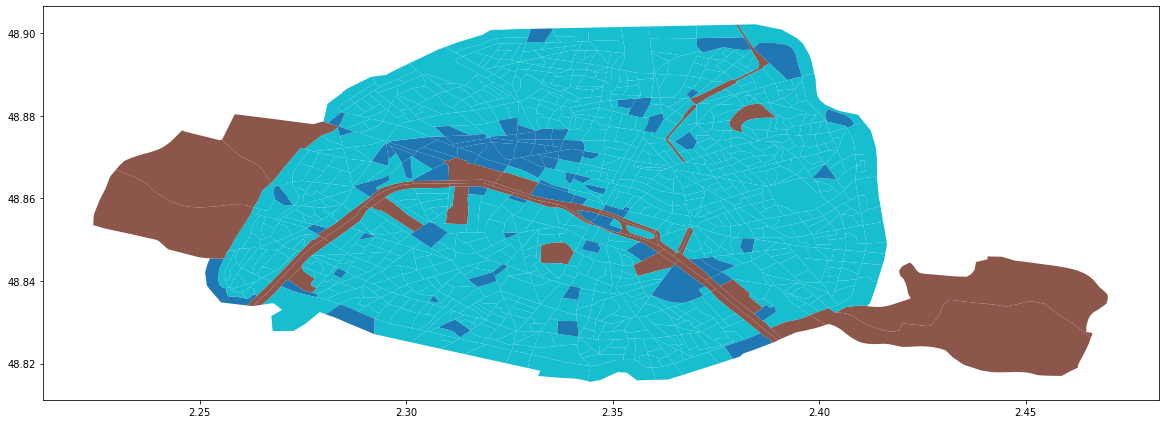

In [41]:
paris_gdf = contours[contours["CODE_IRIS"].isin(paris_iris_set)]
paris_gdf.plot(column="TYP_IRIS", figsize=(20,8))

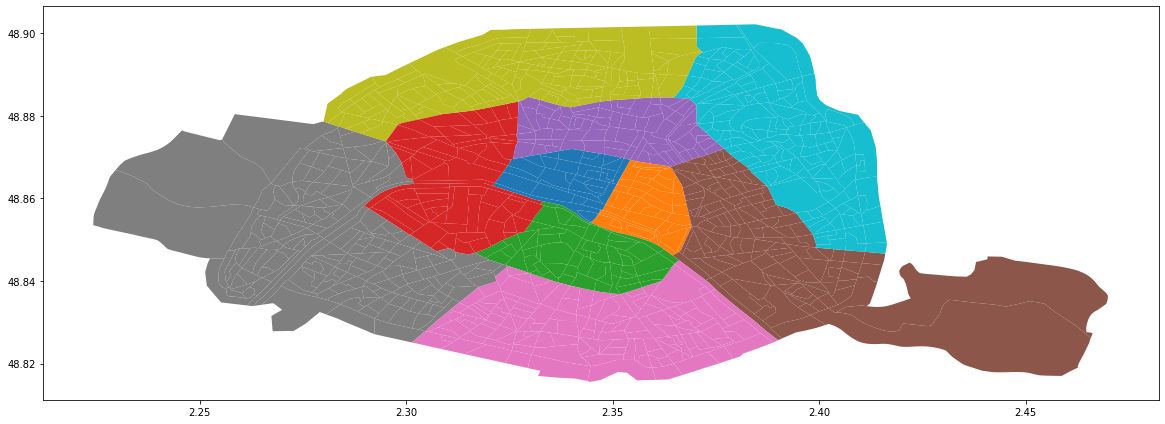

In [42]:
paris_gdf.plot(column="INSEE_COM", figsize=(20,8))

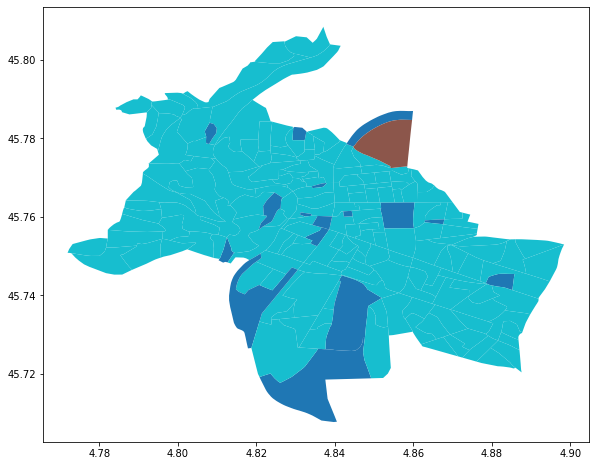

In [43]:
lyon_gdf = contours[contours["CODE_IRIS"].isin(lyon_iris_set)]
lyon_gdf.plot(column="TYP_IRIS", figsize=(20,8))

In [44]:
paris_gdf

INSEE_COM                   NOM_COM  IRIS  CODE_IRIS  \
77        75119  Paris 19e Arrondissement  7316  751197316   
82        75117  Paris 17e Arrondissement  6716  751176716   
176       75110  Paris 10e Arrondissement  3703  751103703   
435       75118  Paris 18e Arrondissement  7104  751187104   
467       75111  Paris 11e Arrondissement  4314  751114314   
...         ...                       ...   ...        ...   
48319     75110  Paris 10e Arrondissement  4003  751104003   
48411     75118  Paris 18e Arrondissement  7021  751187021   
48434     75115  Paris 15e Arrondissement  5917  751155917   
48512     75115  Paris 15e Arrondissement  5719  751155719   
48518     75114  Paris 14e Arrondissement  5405  751145405   

                      NOM_IRIS TYP_IRIS  \
77                 Villette 16        H   
82              Batignolles 16        H   
176    Saint-Vincent de Paul 3        H   
435              Goutte d'Or 4        H   
467                Roquette 14        H   
...                        ...      ...   
48319    Hopital Saint-Louis 3        H   
48411          Clignancourt 21        H   
48434              Grenelle 17        H   
48512         Saint-Lambert 19        H   
48518     Parc de Montsouris 5        H   

                                                geometry  
77     POLYGON ((2.37225 48.89133, 2.37228 48.89141, ...  
82     POLYGON ((2.30708 48.88784, 2.30651 48.88828, ...  
176    POLYGON ((2.35598 48.87976, 2.35608 48.87975, ...  
435    POLYGON ((2.35673 48.88544, 2.35679 48.88509, ...  
467    POLYGON ((2.37679 48.85639, 2.37645 48.85627, ...  
...                                                  ...  
48319  POLYGON ((2.37230 48.87136, 2.37290 48.87057, ...  
48411  POLYGON ((2.34630 48.89216, 2.34610 48.89220, ...  
48434  POLYGON ((2.29914 48.85212, 2.29760 48.85167, ...  
48512  POLYGON ((2.30597 48.83161, 2.30526 48.83183, ...  
48518  POLYGON ((2.33508 48.82743, 2.33486 48.82747, ...  

[992 rows x 7 columns]

In [45]:
paris_gdf.total_bounds

array([ 2.22421717, 48.81556224,  2.46985107, 48.90214759])

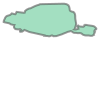

In [46]:
paris_gdf.unary_union

In [47]:
gdf = lyon_gdf
#gdf = paris_gdf


x0,y0,x1,y1 = gdf.total_bounds
NB_POINTS = 50000
MS=3

np.random.seed(1)
rand_coord_list = list(zip(np.random.uniform(low=x0, high=x1, size=NB_POINTS),
                           np.random.uniform(low=y0, high=y1, size=NB_POINTS)))

In [48]:
from shapely.geometry import Point
rand_point_list = [Point(*coord) for coord in rand_coord_list]
rand_geo = gpd.GeoSeries(rand_point_list)
rand_gdf = gpd.GeoDataFrame(geometry=rand_geo, crs=WGS84)

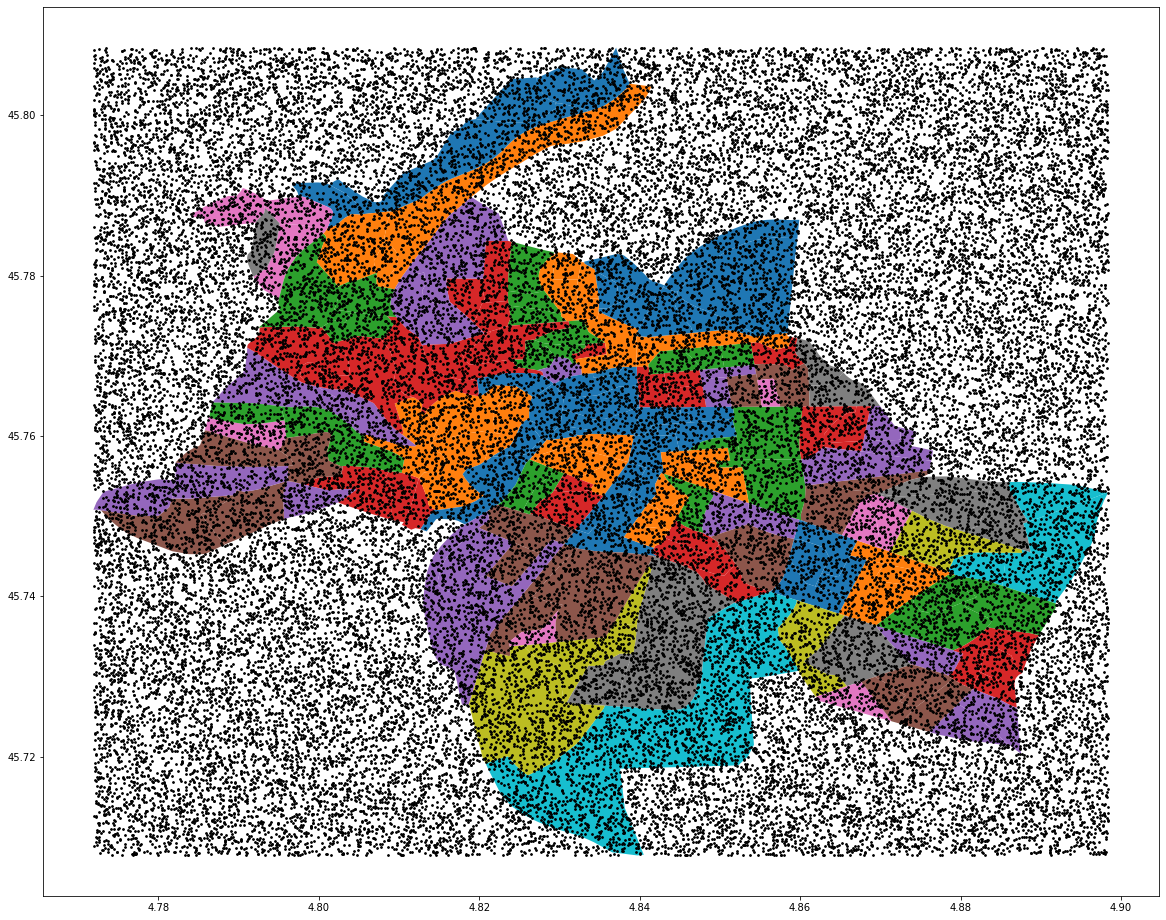

In [49]:

ax = gdf.plot(figsize=(20,20), column="IRIS")
rand_gdf.plot(ax=ax, color="k", markersize=MS) #alpha=0.2)

In [50]:
# https://gis.stackexchange.com/questions/282681/filter-a-geopandas-dataframe-for-points-within-a-specific-country

jdf = gpd.tools.sjoin(rand_gdf, gdf, how="left")



/home/devel/PRIVATE/mapdata/mapenv/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != EPSG:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


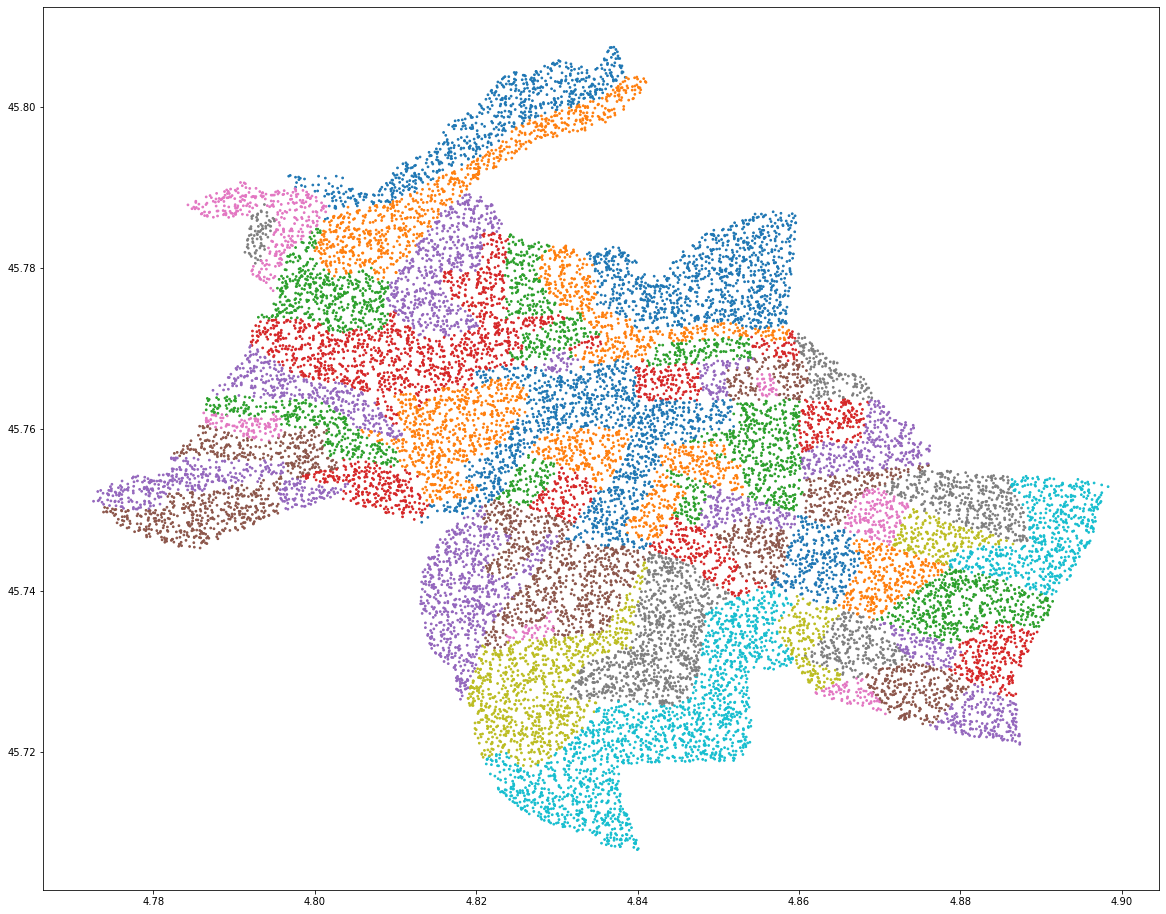

In [51]:
jdf[jdf["index_right"].notnull()].plot(figsize=(20,20), column="IRIS", markersize=MS)

In [52]:
# TODO: 
# https://stackoverflow.com/questions/23871409/optimal-way-of-aggregating-geographic-points-with-python-shapely/24114565#24114565
# https://gis.stackexchange.com/questions/102933/more-efficient-spatial-join-in-python-without-qgis-arcgis-postgis-etc/165413#165413

In [53]:
jdf

geometry  index_right INSEE_COM  \
0      POINT (4.82466 45.75250)       2151.0     69382   
1      POINT (4.86302 45.74020)      12797.0     69388   
2      POINT (4.77193 45.74798)          NaN       NaN   
3      POINT (4.81015 45.75372)       2434.0     69385   
4      POINT (4.79047 45.75229)      38871.0     69385   
...                         ...          ...       ...   
49995  POINT (4.82282 45.78493)      48367.0     69384   
49996  POINT (4.83478 45.78088)      35021.0     69384   
49997  POINT (4.86866 45.79009)          NaN       NaN   
49998  POINT (4.77662 45.76490)          NaN       NaN   
49999  POINT (4.88311 45.76945)          NaN       NaN   

                      NOM_COM  IRIS  CODE_IRIS               NOM_IRIS TYP_IRIS  
0      Lyon 2e Arrondissement  0301  693820301       Vaubecour-Mairie        H  
1      Lyon 8e Arrondissement  0105  693880105     Marius Berliet Sud        H  
2                         NaN   NaN        NaN                    NaN      NaN  
3      Lyon 5e Arrondissement  0402  693850402           Saint-Irenee        H  
4      Lyon 5e Arrondissement  0503  693850503           Pierre Valdo        H  
...                       ...   ...        ...                    ...      ...  
49995  Lyon 4e Arrondissement  0501  693840501       Lyon Plage-Ypres        H  
49996  Lyon 4e Arrondissement  0102  693840102  Boucle Louis Thevenet        H  
49997                     NaN   NaN        NaN                    NaN      NaN  
49998                     NaN   NaN        NaN                    NaN      NaN  
49999                     NaN   NaN        NaN                    NaN      NaN  

[50000 rows x 8 columns]

In [54]:
# Generate random points in paris
start = time.time()
gdf = paris_gdf.copy()
gdf.crs = WGS84


x0,y0,x1,y1 = gdf.total_bounds
NB_POINTS = 4000000
MS=3

np.random.seed(1)
rand_coord_list = list(zip(np.random.uniform(low=x0, high=x1, size=NB_POINTS),
                           np.random.uniform(low=y0, high=y1, size=NB_POINTS)))

rand_gdf = gpd.GeoDataFrame(
    geometry=gpd.GeoSeries([Point(*coord) for coord in rand_coord_list]),
    crs = WGS84)
jdf = gpd.tools.sjoin(rand_gdf, gdf, how="left")
jdf = jdf[jdf["index_right"].notnull()]
print(f"generation time: {time.time()-start}")

/home/devel/PRIVATE/mapdata/mapenv/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != EPSG:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


generation time: 217.9836859703064


In [55]:
#jdf.remove_column("index_right")


#jdf.plot(figsize=(20,20), column="CODE_IRIS", markersize=1)
#paris_gdf

In [56]:
import datetime

t0 = datetime.datetime(2020, 3, 1)
dt = datetime.timedelta(days=7, seconds=np.random.normal(loc=0.0, scale=86400))
(t0+dt).timestamp()

1583642378.046091

In [57]:
import random
random.seed(1)
np.random.seed(1)

def random_filter_func(x):
    return random.random() < ((hash(x)%10)/10)

def random_date_func(x):
    base_day =1+ hash(hash(x))%10
    t0 = datetime.datetime(2020, 3, base_day)
    dt = datetime.timedelta(days=7, seconds=np.random.normal(loc=0.0, scale=24*60*60))
    return (t0+dt).timestamp()


part_jdf = jdf[jdf["CODE_IRIS"].apply(random_filter_func)].copy()
part_jdf["timestamp"] = part_jdf["CODE_IRIS"].apply(random_date_func)
part_jdf["date"] = part_jdf["timestamp"].apply(pd.Timestamp, unit='s')


In [64]:
#part_jdf["CODE_IRIS"]
len(set(part_jdf["IRIS"].values))

901

In [33]:
for n in [1000, 3000, 10000, 30000, 100000, 300000, 1000000]:
    part_jdf.iloc[0:n].to_csv("inria_rand_paris_%s.csv" % n)
os.system("gzip -9 -v inria_rand*.csv")

NameError: name 'part_jdf' is not defined

In [447]:
jdf

geometry  index_right INSEE_COM  \
0        POINT (2.32665 48.85332)      20964.0     75107   
3        POINT (2.29848 48.83068)      15758.0     75115   
7        POINT (2.30910 48.86318)      22039.0     75107   
8        POINT (2.32168 48.82625)       8229.0     75114   
9        POINT (2.35657 48.88573)        435.0     75118   
...                           ...          ...       ...   
3999989  POINT (2.29355 48.86760)      29348.0     75116   
3999990  POINT (2.33786 48.88612)      20492.0     75118   
3999993  POINT (2.34944 48.83690)      18632.0     75113   
3999994  POINT (2.33843 48.85308)      27834.0     75106   
3999995  POINT (2.43676 48.82103)      46785.0     75112   

                          NOM_COM  IRIS  CODE_IRIS                NOM_IRIS  \
0         Paris 7e Arrondissement  2501  751072501  Saint-Thomas d'Aquin 1   
3        Paris 15e Arrondissement  5704  751155704         Saint-Lambert 4   
7         Paris 7e Arrondissement  2899  751072899       Seine et Berges 3   
8        Paris 14e Arrondissement  5505  751145505       Petit Montrouge 5   
9        Paris 18e Arrondissement  7104  751187104           Goutte d'Or 4   
...                           ...   ...        ...                     ...   
3999989  Paris 16e Arrondissement  6403  751166403              Chaillot 3   
3999990  Paris 18e Arrondissement  6909  751186909     Grandes Carrieres 9   
3999993  Paris 13e Arrondissement  5207  751135207           Croulebarbe 7   
3999994   Paris 6e Arrondissement  2101  751062101               Monnaie 1   
3999995  Paris 12e Arrondissement  4677  751124677     Bois de Vincennes 2   

        TYP_IRIS  
0              H  
3              H  
7              D  
8              H  
9              H  
...          ...  
3999989        H  
3999990        H  
3999993        H  
3999994        H  
3999995        D  

[2429988 rows x 8 columns]

In [66]:
contours["CODE_IRIS"]

0        721910000
1        772480000
2        514260000
3        811990000
4        592250102
           ...    
48585    385450101
48586    740630000
48587    951010000
48588    384030000
48589    930010501
Name: CODE_IRIS, Length: 48590, dtype: object

In [73]:
# https://stackoverflow.com/questions/46049658/mapping-columns-from-one-dataframe-to-another-to-create-a-new-column
#contours
df.set_index("CODE_IRIS")[["GRD_QUART", "DEPCOM"]]

GRD_QUART DEPCOM
CODE_IRIS                 
010010000   0100100  01001
010020000   0100200  01002
010040101   0100401  01004
010040102   0100401  01004
010040201   0100402  01004
...             ...    ...
976170301   9761703  97617
976170302   9761703  97617
976170303   9761703  97617
976170304   9761703  97617
976170400   9761704  97617

[49404 rows x 2 columns]

In [74]:
contours.store

AttributeError: 'GeoDataFrame' object has no attribute 'store'